<a href="https://colab.research.google.com/github/ChakrabortyJoy/NLP-mini-beginner-project/blob/main/NLP_beginner_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/nlpBeginnerProjects-master/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
print("spam count: " +str(len(df.loc[df.spam==1])))
print("not spam count: " +str(len(df.loc[df.spam==0])))
print(df.shape)
df['spam'] = df['spam'].astype(int)

df = df.drop_duplicates()
print(df.shape)

df = df.reset_index(inplace = False)[['text','spam']]

spam count: 1368
not spam count: 4360
(5728, 2)
(5695, 2)


In [4]:
print(df.shape)

(5728, 2)


In [5]:
df['spam'].unique()

array([1, 0])

In [7]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df = df.reset_index()        
df.head(6)

,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1
3,3,subject color printing special request additio...,1
4,4,subject do not have money get software cds fro...,1
5,5,subject great nnews hello welcome to medzonlin...,1


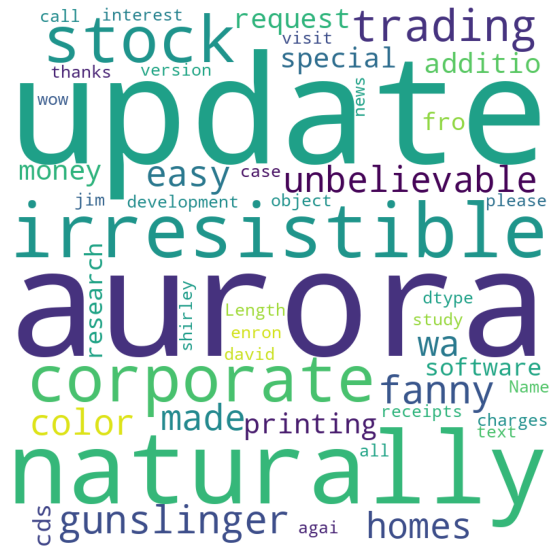

In [10]:
df1 =df.loc[df.spam==0]
df2 =df.loc[df.spam==1]
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
#set the word cloud parameters
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

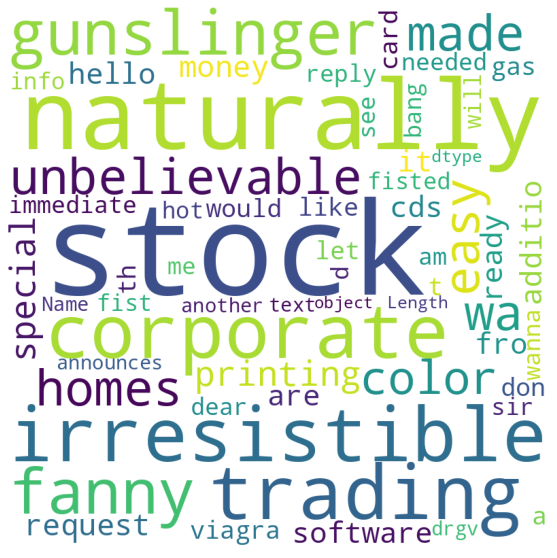

In [13]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### SPAM DETECTION

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

#list of sentences
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]

#instantiate the class
cv = CountVectorizer()

# tokenize and build vocab
cv.fit(text)

# summarize
print(cv.vocabulary_)

# encode document
vector = cv.transform(text)

# summarize encoded vector
print(vector.toarray())

{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
text_vec = CountVectorizer().fit_transform(df['text'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45
                                                    , random_state = 42, shuffle = True)

from sklearn import ensemble 
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #controls rate at which additional decision trees influes overall prediction
    max_depth = 6, 
#     min_samples_split = 21,
#     min_samples_leaf = 19, 
    #max_features = 0.9,
    #loss = 'huber'
)

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1942
           1       0.98      0.89      0.94       636

    accuracy                           0.97      2578
   macro avg       0.97      0.94      0.96      2578
weighted avg       0.97      0.97      0.97      2578



In [16]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2418
           1       1.00      1.00      1.00       732

    accuracy                           1.00      3150
   macro avg       1.00      1.00      1.00      3150
weighted avg       1.00      1.00      1.00      3150

Confusion Matrix: 
 [[2418    0]
 [   0  732]]

Accuracy:  1.0


In [17]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))

print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1942
           1       0.98      0.89      0.94       636

    accuracy                           0.97      2578
   macro avg       0.97      0.94      0.96      2578
weighted avg       0.97      0.97      0.97      2578

Confusion Matrix: 
 [[1930   12]
 [  67  569]]

Accuracy:  0.9693560899922421


In [18]:
from textblob import TextBlob

#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head(3)

,index,text,spam,tb_Pol,tb_Subj
0,0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581


### Sentiment Analysis

In [19]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [20]:
blob=TextBlob("This is a good example of a TextBlob")

In [22]:
print(blob)
blob.sentiment

This is a good example of a TextBlob


Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [23]:
#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]

In [24]:
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head(3)

,index,text,spam,tb_Pol,tb_Subj
0,0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581
